##  Dataset Description

The PCOS dataset is focused on key biomedical indicators that are most relevant for predicting **Polycystic Ovary Syndrome (PCOS)**. These selected features are commonly used in clinical diagnosis and machine learning models.

| **Attribute**                        | **Description** |
|-------------------------------------|-----------------|
| `Age`                               | Age of the patient in years. |
| `BMI`                               | Body Mass Index – a measure of body fat based on height and weight. Higher BMI is often associated with hormonal imbalances. |
| `Menstrual_Irregularity`            | Binary variable indicating if the menstrual cycle is irregular (1 = Yes, 0 = No). Irregularity is a major symptom of PCOS. |
| `Testosterone_Level (ng/dL)`        | Level of testosterone in the blood. Elevated levels are a key hormonal marker of PCOS. |
| `Antral_Follicle_Count`             | Count of small follicles in the ovaries. Higher counts may suggest PCOS. |
| `PCOS_Diagnosis`                    | **Target variable** – 1 indicates presence of PCOS, 0 indicates absence. |

These features have been selected for building a **binary classification model** using an **Artificial Neural Network (ANN)** to predict whether a patient is diagnosed with PCOS.



### Importing Required Libraries


 Python libraries such as pandas, numpy, seaborn, matplotlib , and TensorFlow/Keras for building the ANN model.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

###  Loading the Dataset

In [2]:
df = pd.read_csv('pcos_dataset.csv')

###  Exploratory Data Analysis

 The dataset shows a clear class imbalance in the target variable, PCOS_Diagnosis, with a much larger number of individuals not diagnosed with PCOS compared to those who are. This imbalance could potentially impact the performance of machine learning models and may require techniques such as resampling or applying class weights during model training. The distribution of Antral Follicle Count indicates a wide range of values, with a slight peak in the mid-range (around 17–19 follicles), suggesting good variability in this feature, which could make it a strong predictor for PCOS. Similarly, the Testosterone Level (ng/dL) is fairly normally distributed, with small peaks around 40–50 ng/dL and 65–75 ng/dL, indicating a consistent spread of hormone levels across individuals. This normal distribution is beneficial for models that assume Gaussian input and supports the relevance of this feature in PCOS detection.



In [14]:
print(df.describe())
print(df.info())


               Age         BMI  Menstrual_Irregularity  \
count  1000.000000  1000.00000             1000.000000   
mean     31.771000    26.38700                0.530000   
std       8.463462     4.93554                0.499349   
min      18.000000    18.10000                0.000000   
25%      24.000000    21.90000                0.000000   
50%      32.000000    26.40000                1.000000   
75%      39.000000    30.50000                1.000000   
max      45.000000    35.00000                1.000000   

       Testosterone_Level(ng/dL)  Antral_Follicle_Count  PCOS_Diagnosis  
count                1000.000000            1000.000000     1000.000000  
mean                   60.159500              17.469000        0.199000  
std                    23.160204               7.069301        0.399448  
min                    20.000000               5.000000        0.000000  
25%                    41.700000              12.000000        0.000000  
50%                    60.000000 

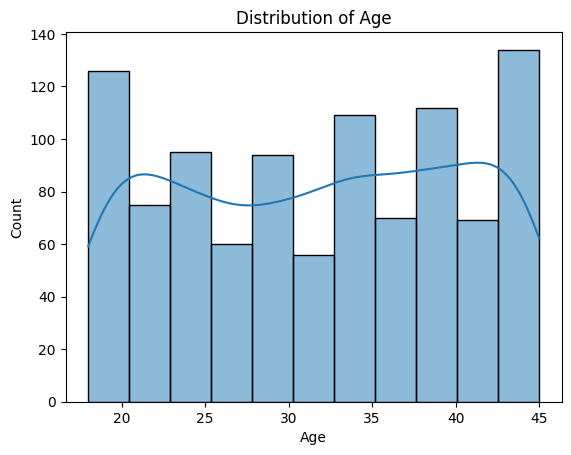

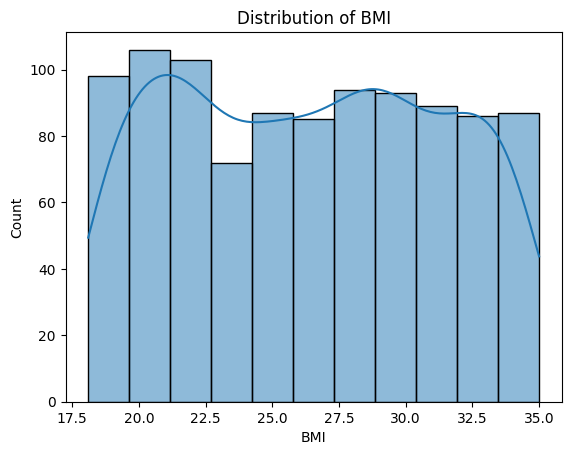

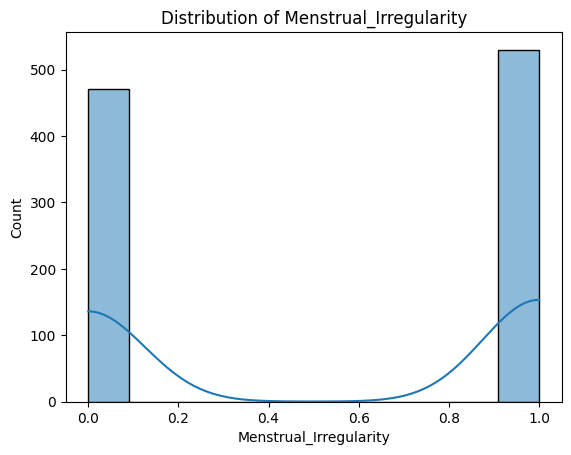

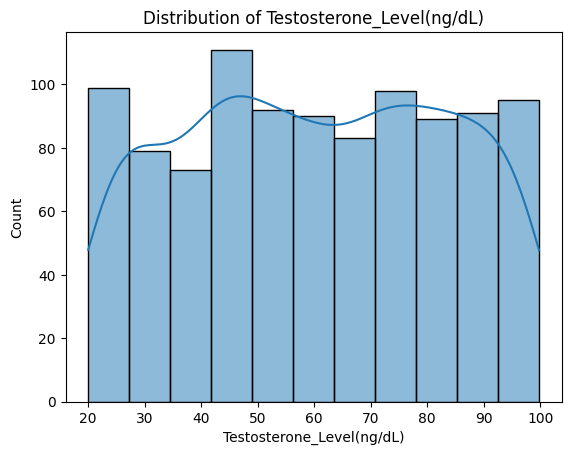

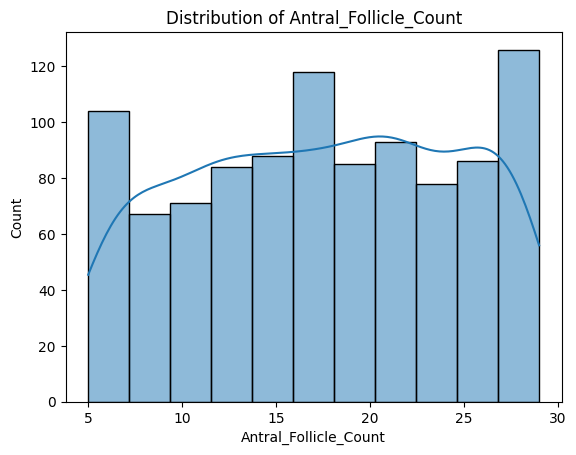

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns[:-1]:  # all features except target
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


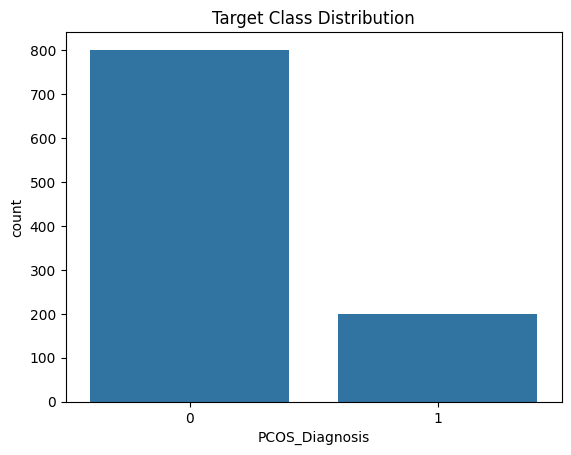

In [16]:
sns.countplot(x='PCOS_Diagnosis', data=df)
plt.title('Target Class Distribution')
plt.show()


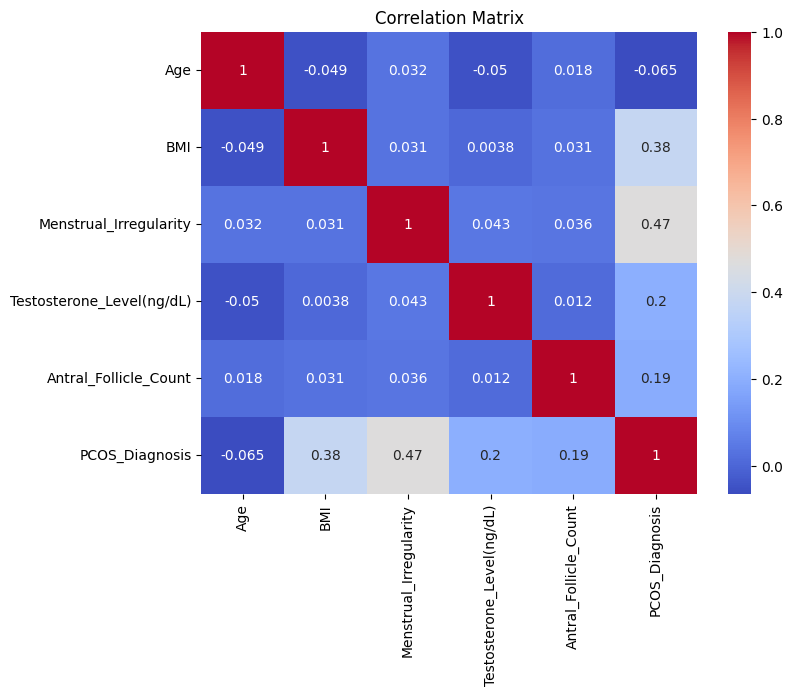

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Target Variable for Binary Classification

In [3]:
X = df.drop('PCOS_Diagnosis', axis=1)
y = df['PCOS_Diagnosis']

###  Feature Scaling

This step standardizes the input features using `StandardScaler`, which helps improve model convergence and training efficiency.


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###  Splitting Dataset

Separating the dataset into features (X) and target variable (y), then splitting it into training, validating and testing datasets to evaluate model performance.


In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [6]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [7]:
print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])

Train size: 700
Validation size: 150
Test size: 150


###  Building the ANN Model

Defining the structure of the Artificial Neural Network using Keras Sequential API. It includes input, hidden, and output layers with ReLU and sigmoid activations.


In [8]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(1, activation='sigmoid')  # binary output
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

###  Training the ANN

Compiling and fitting the ANN model on the training data. The model uses binary cross-entropy as the loss function and Adam as the optimizer.


In [20]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=8
)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9391 - loss: 0.1575 - val_accuracy: 0.9867 - val_loss: 0.0390
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9581 - loss: 0.1516 - val_accuracy: 0.9800 - val_loss: 0.0469
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9486 - loss: 0.1645 - val_accuracy: 0.9867 - val_loss: 0.0392
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9387 - loss: 0.1647 - val_accuracy: 0.9867 - val_loss: 0.0374
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9460 - loss: 0.1362 - val_accuracy: 0.9867 - val_loss: 0.0372
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9456 - loss: 0.1447 - val_accuracy: 0.9800 - val_loss: 0.0478
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9448 - loss: 0.1384 - val_accuracy: 0.9933 - val_loss: 0.0385
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9320 - loss: 0.1432 - val_accuracy: 0.9800 - val_loss:

###  Model Evaluation

Making predictions on the test data and evaluating the performance using a confusion matrix and classification report.


In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9759 - loss: 0.0413 
Test accuracy: 0.9733


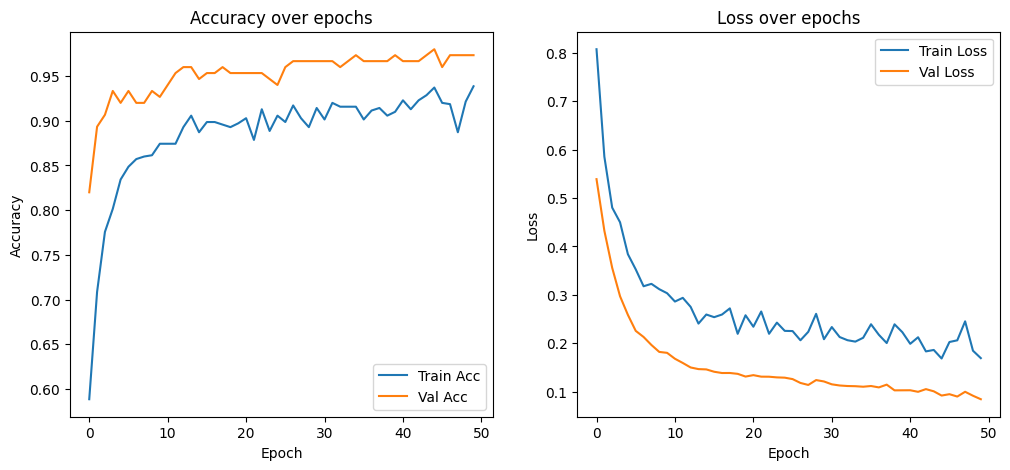

In [12]:
import matplotlib.pyplot as plt

def plot_history(history):

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


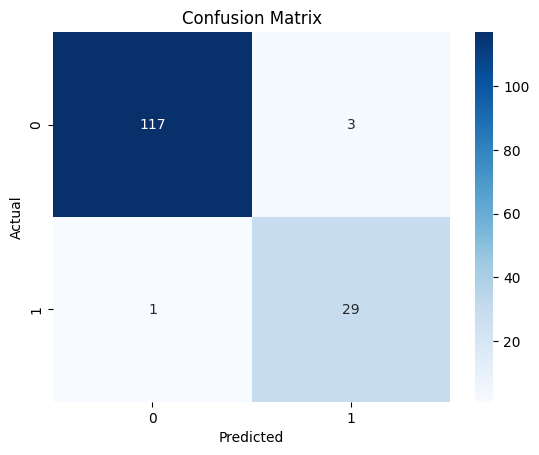

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       120
           1       0.91      0.97      0.94        30

    accuracy                           0.97       150
   macro avg       0.95      0.97      0.96       150
weighted avg       0.97      0.97      0.97       150



In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print(classification_report(y_test, y_pred))
